In [1]:
import os 
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import math
from sklearn import metrics

warnings.filterwarnings("ignore")

In [2]:
filespath="H:\Warehouse\Data\DataUsedForPublication\Partial IsotopeProfile paper data used for publication\liverpool_CI\liver"
protiens=[ x for x in os.listdir(filespath) if (".Quant.csv") in x]

res=pd.DataFrame()
for file in protiens:
    
    try:
        list(pd.read_csv(os.path.join(filespath,file), skiprows=1,index_col=False).Peptide)
        res=pd.concat([res,pd.read_csv(os.path.join(filespath,file), skiprows=1,index_col=False)])  
    except:
        list(pd.read_csv(os.path.join(filespath,file), skiprows=3,index_col=False).Peptide)
        res=pd.concat([res,pd.read_csv(os.path.join(filespath,file), skiprows=3,index_col=False)])  
        
        

In [3]:
res

,Peptide,UniqueToProtein,Exchangeable Hydrogens,Charge,m/z(Sequence),M0,M1,M2,M3,M4,...,I1.11,I2.11,I3.11,I4.11,I5.11,Start Elution (min).11,End Elution (min).11,I0 Peak Width.11,Total Labeling.12,Net Labeling.11
0,NLLSVAYK,No,11,2,454.26599,58.030,30.342,9.172,2.031,0.362,...,1093816000.0,579122900.0,192473100.0,58030120.0,9012703.0,38.159962,38.384819,0.0001,0.50926,0.186437
1,EMQPTHPIR,No,21,3,370.19043,50.917,30.906,12.900,4.018,1.005,...,210457800.0,155419400.0,77888640.0,31394280.0,10591990.0,18.565918,18.729511,0.0001,0.602036,0.239675
2,DSTLIMQLLR,No,16,2,595.33411,48.532,31.604,13.829,4.522,1.191,...,2074063000.0,1553297000.0,781084300.0,293169600.0,89676220.0,67.00631,67.259964,0.0001,0.576532,0.190398
3,YLSEVASGENK,Yes,23,2,598.79327,50.852,32.518,12.269,3.414,0.770,...,178110700.0,151365800.0,87354120.0,34175270.0,8094392.0,23.606974,24.672041,0.0001,0.630086,0.239263
4,DSTLImQLLR,No,16,2,603.33154,48.532,31.604,13.829,4.522,1.191,...,36900160.0,22052220.0,11620070.0,4757536.0,2203624.0,61.689384,62.532894,0.0001,0.486553,0.094899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,SSEPVQHEENIR,Yes,33,3,475.56366,45.601,33.879,14.516,4.552,1.151,...,0.0,0.0,0.0,0.0,0.0,1064.170044,1064.170044,0.0,0.0,-0.35197
0,LILVDYVLFK,Yes,7,2,611.87592,45.843,34.651,14.201,4.136,0.952,...,,,,,,,,,,
1,DLGLSQGSFAFIHK,Yes,25,3,507.26831,40.248,35.199,16.825,5.741,1.553,...,,,,,,,,,,
0,GPLSQAPTPAPK,Yes,28,2,582.32458,50.545,33.037,12.248,3.302,0.714,...,,,,,,,,,,


In [4]:
res["Peptide"]=[x.upper() for x in res.Peptide]
print(res.shape)
res=res.drop_duplicates(subset=['Peptide'])
print(res.shape)

(27307, 204)
(21619, 204)


In [5]:
# pd.read_csv(os.path.join(filespath,file), skiprows=3,index_col=False)[[' M0',' M1',' M2',' M3',' M4',' M5']]

In [6]:
# "print(len(res))
# temp_pep=(np.array(res))
# temp_pep=np.unique([x.upper() for x in temp_pep])
# temp_pep.shape"

7 52


<BarContainer object of 44 artists>

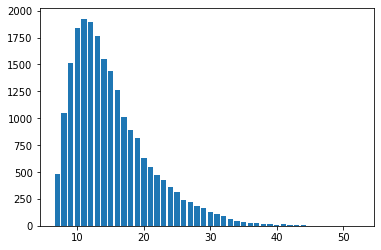

In [7]:
x,y=np.unique(np.array([len(x) for x in res["Peptide"]]),return_counts=True)
print(min(x),max(x))
plt.bar(x,y)

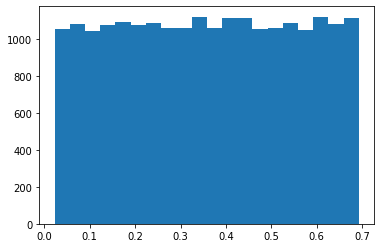

In [8]:
rate=[x for x in np.array(np.random.uniform(low = math.log(2)/31, high = math.log(2), size = res.shape[0] )).ravel()]#np.rint
res["rate"]=rate
count, bins, ignored = plt.hist(rate, 20, density=False)

In [75]:
trueval=[4.0,1.62,1.89,3.95,0.32,2.06,2.88,1.0,0.6,0.54,1.12,1.89,2.59,3.95,3.43,2.61,0.2,0.56,0.08,0.42]
trueval=[2]*20
all_AAs=[x.upper() for x in
         ['a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'p','q', 'r', 's', 't', 'v', 'w', 'y']]

In [76]:
def compute_neh(seq):
    res=0
    for c in seq:
        res+=trueval[all_AAs.index(c)]
    return int(res)

In [77]:
pep_neh=[]
for pep in res["Peptide"]:
    pep_neh.append(compute_neh(pep))
res["pep_neh"]=pep_neh
len(pep_neh)

21619

14 104


<BarContainer object of 44 artists>

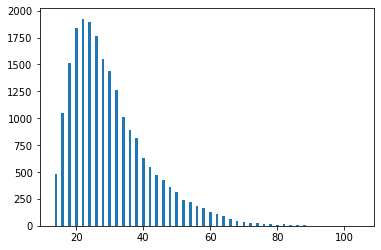

In [78]:
x,y=np.unique(np.array(pep_neh),return_counts=True)
print(min(x),max(x))
plt.bar(x,y)

In [79]:
# I0=[x for x in np.array(np.random.uniform(low = 0.15, high = 0.55, size = res.shape[0] )).ravel()]#np.rint
# res["I0"]=I0
# count, bins, ignored = plt.hist(I0, 20, density=False)

In [80]:
def compute_ioasym(i0,neh):
    pw=0.05
    ph=1.5574E-4
    return i0*(1-pw/(1-ph))**neh

In [81]:
def compute_i0_t(t,k,neh,i0):
    io_asym=compute_ioasym(i0,neh)
    return  io_asym + (i0-io_asym)*(math.exp(-k*t))

In [82]:
res=res.reset_index(drop=True)

0.9356099636515658 0.02748602986196779
0.8388832617938591 0.047835160780779436
0.7916944315041187 0.048351199308185086
0.8307683404749573 0.04079243655492322
0.8297723220761143 0.04205431279992541
0.8959412491986106 0.029774668390305264
0.925782424118914 0.028091084544348433
0.8930500690467468 0.032854568773894935
0.9335711198243213 0.027269590956782462
0.9419771279239568 0.02402490638816078
0.9011400113671896 0.033577879696258243
0.7094789505483777 0.0508931103014781
0.8311238828580473 0.04443258953659798
0.8968665666647867 0.040688396236156915
0.9030039632142592 0.0349151407385743
0.9225045851931635 0.02466824831347346
0.8240350754326886 0.04291338578285086
0.9062501022168354 0.028221320344871556
0.9688253110953521 0.018003829781535193
0.8858117418266633 0.03345344445754182


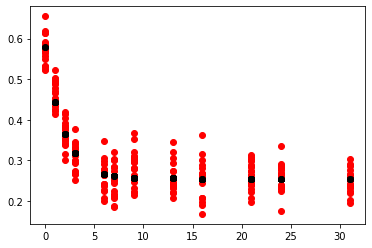

In [137]:
for k in range(20):
    io_ts=[]
    io_ns=[]
    times=[0,1 ,2 ,3 ,6 ,7 ,9 ,13,16,21,24,31]
    for i in times:
        io_ts.append(compute_i0_t(i,res["rate"][0],res["pep_neh"][0],res[" M0"][0]/100))
        io_ns.append(io_ts[-1]+np.random.normal(0,0.035,1))
    plt.scatter(times,io_ns,c='r')
    plt.scatter(times,io_ts,c='k')
    print(metrics.r2_score(io_ns,io_ts),(metrics.mean_squared_error(io_ns,io_ts))**0.5)

In [138]:

sim_res=[]
for i in range(res.shape[0]):
    temp_res=[
    res["Peptide"][i],res["pep_neh"][i],
    res["rate"][i],
    res[" M0"][i],res[" M1"][i],res[" M2"][i],
    res[" M3"][i],res[" M4"][i],res[" M5"][i]
    ]
    
    io_ts=[]
    io_ns=[] 
    for t in times:
        io_ts.append(compute_i0_t(t,res["rate"][i],res["pep_neh"][i],res[" M0"][i]/100))
        io_ns.append(float(io_ts[-1]+np.random.normal(0,0.05,1)))
        
    temp_res+=[metrics.r2_score(io_ns,io_ts),(metrics.mean_squared_error(io_ns,io_ts))**0.5]
    
    temp_res+=io_ns+io_ts
    sim_res.append(temp_res)
    

In [139]:
df_sim_res=pd.DataFrame(sim_res)
df_sim_res.columns=["Pep",'NEH','k','M0','M1','M2','M3','M4','M5','R2','RMSE']+ [f'T_i0_{t}' for t in times] +[f'N_i0_{t}' for t in times]

In [140]:
df_sim_res.to_csv("NEH_sim.csv",index=False)

In [141]:
df_sim_res.columns

Index(['Pep', 'NEH', 'k', 'M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'R2', 'RMSE',
       'T_i0_0', 'T_i0_1', 'T_i0_2', 'T_i0_3', 'T_i0_6', 'T_i0_7', 'T_i0_9',
       'T_i0_13', 'T_i0_16', 'T_i0_21', 'T_i0_24', 'T_i0_31', 'N_i0_0',
       'N_i0_1', 'N_i0_2', 'N_i0_3', 'N_i0_6', 'N_i0_7', 'N_i0_9', 'N_i0_13',
       'N_i0_16', 'N_i0_21', 'N_i0_24', 'N_i0_31'],
      dtype='object')

In [142]:
# df_sim_res['_i0_31'][0]

In [143]:
math.log(0.11665089731141727/0.5803)/ math.log(1- (0.05/ (1-1.5574E-4)))


31.2731548534781

In [144]:
df_sim_res[['N_i0_1', 'N_i0_2', 'N_i0_3', 'N_i0_6', 'N_i0_7', 'N_i0_9', 'N_i0_13',
       'N_i0_16', 'N_i0_21', 'N_i0_24', 'N_i0_31','R2']]

,N_i0_1,N_i0_2,N_i0_3,N_i0_6,N_i0_7,N_i0_9,N_i0_13,N_i0_16,N_i0_21,N_i0_24,N_i0_31,R2
0,0.443215,0.363966,0.318151,0.267501,0.262384,0.257715,0.255634,0.255423,0.255375,0.255373,0.255372,0.836324
1,0.375442,0.299975,0.257386,0.212134,0.207815,0.204002,0.202400,0.202252,0.202222,0.202220,0.202220,0.880946
2,0.456115,0.429649,0.405665,0.346388,0.330214,0.302275,0.260490,0.238352,0.213308,0.203240,0.188650,0.617860
3,0.460771,0.419649,0.384235,0.304850,0.285369,0.254144,0.213808,0.195993,0.179416,0.174025,0.167842,0.776535
4,0.384319,0.322613,0.278569,0.208677,0.197245,0.183261,0.172507,0.170108,0.168991,0.168829,0.168745,0.929675
...,...,...,...,...,...,...,...,...,...,...,...,...
21614,0.295888,0.215172,0.174483,0.138422,0.135794,0.133802,0.133168,0.133129,0.133124,0.133124,0.133124,0.857125
21615,0.395012,0.345268,0.306251,0.232811,0.218041,0.197370,0.176826,0.170352,0.166107,0.165179,0.164472,0.672260
21616,0.305826,0.239623,0.194278,0.127376,0.117396,0.105878,0.097939,0.096418,0.095807,0.095733,0.095701,0.697629
21617,0.433300,0.375695,0.329703,0.240258,0.221570,0.194736,0.166728,0.157314,0.150722,0.149168,0.147890,0.837586
